In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset=pd.read_csv('/content/Credit_Card_Applications.csv')

In [5]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [15]:
!pip install minisom
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.4)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

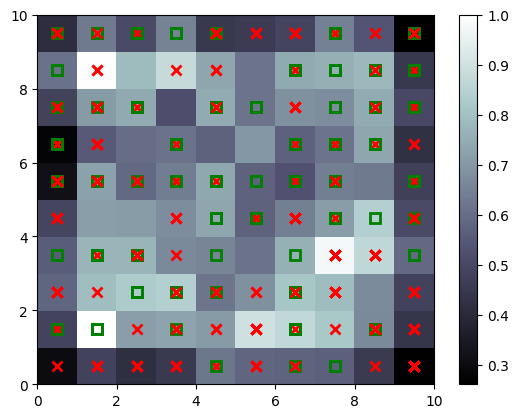

In [16]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['x','s']
colors=['r','g']
for i,x in enumerate(X):
  w= som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[Y[i]],
       markeredgecolor=colors[Y[i]],
       markerfacecolor='None',
       markersize=7,
       markeredgewidth=2)
show()

Finding Frauds

In [17]:
mappings=som.win_map(X)
#Enter the coordinates of white boxes and concatenate each results.
frauds=np.concatenate((mappings[(1,1)],mappings[(7,3)],mappings[(1,8)]), axis=0)

In [18]:
frauds=sc.inverse_transform(frauds)

In [22]:
print("These are potential fraud customers:")
for i in frauds:
  print(i[0])

These are potential fraud customers:
15757467.0
15815443.0
15748432.0
15699963.0
15648876.0
15696287.0
15698749.0
15611973.0
15593178.0
15638272.0
15683276.0
15642001.0
15649101.0
15600027.0
15678779.0
15730150.0
15761158.0
15761733.0
